<a href="https://colab.research.google.com/github/abelranni/modelos-de-simulacion/blob/main/ejercicios-resueltos/_1-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba Chi-cuadrada

Se trata de una prueba de hipótesis a partir de datos, basada en el cálculo de un valor 
llamado estadístico de prueba, al cual suele comparársele con un valor conocido como 
valor crítico, mismo que se obtiene, generalmente, de tablas estadísticas. 
El procedimiento general de la prueba es:

1. Obtener al menos 30 datos de la variable aleatoria a analizar.
2. Calcular la media y varianza de los datos.
3. Crear un histograma de $m = \sqrt n$ intervalos, y obtener la frecuencia observada en 
cada intervalo $O_i$.
4. Establecer explícitamente la hipótesis nula, mediante una distribución de probabilidad que se ajuste a la forma del histograma.
5. Calcular la frecuencia esperada, $E_i$, a partir de la función de probabilidad propuesta.
6. Calcular el estadístico de prueba:
   $$\chi^2_{prueba} = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$$
7. Definir el nivel de significancia de la prueba, $\alpha$, y determinar el valor crítico de 
la prueba, $\chi_{\alpha, m-k-1}^2$ ($k$ es el número de parámetros estimados en la distribución 
propuesta).
1. Comparar el estadístico de prueba con el valor crítico. Si el estadístico de prueba 
es menor que el valor crítico no se puede rechazar la hipótesis nula.


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


## Ejercicio 1-1  Prueba de bondad de ajuste

Estos son los datos del número de automóviles que entran a una gasolinera cada hora:

| 14 |  7 | 13 | 16 | 16 | 13 | 14 | 17 | 15 | 16 |
|----|----|----|----|----|----|----|----|----|----|
| 13 | 15 | 10 | 15 | 16 | 14 | 12 | 17 | 14 | 12 |
| 13 | 20 |  8 | 17 | 19 | 11 | 12 | 17 |  9 | 18 |
| 20 | 10 | 18 | 15 | 13 | 16 | 24 | 18 | 16 | 18 |
| 12 | 14 | 20 | 15 | 10 | 13 | 21 | 23 | 15 | 18 |
	
Determinar la distribución de probabilidad con un nivel de significancia $\alpha$ de 5%.

El histograma de los $n = 50$ datos, que considera 
- $m = 11$ intervalos, 
- la media muestral $\bar{x} = 15.04$
- la varianza muestral $s^2 = 13.14$, 

permite establecer la siguiente hipótesis:

$H_0$: Poisson ($\lambda = 15$) automóviles/hora

$H_1$: Otra distribución


Para realizar la prueba de hipótesis, primero necesitamos calcular las frecuencias esperadas en cada intervalo para la distribución de Poisson propuesta. Para ello, utilizaremos la fórmula de la función de masa de probabilidad de Poisson:

$$P(k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

Donde $\lambda = 15$ es la media y $k$ es el número de automóviles por hora en cada intervalo.


In [5]:

# Definir los datos
datos = np.array([
    14, 7, 13, 16, 16, 13, 14, 17, 15, 16,
    13, 15, 10, 15, 16, 14, 12, 17, 14, 12,
    13, 20, 8, 17, 19, 11, 12, 17, 9, 18,
    20, 10, 18, 15, 13, 16, 24, 18, 16, 18,
    12, 14, 20, 15, 10, 13, 21, 23, 15, 18
])
n = datos.size

# Definir los intervalos de clase
m = 8
intervalos = np.arange(8, 26, 2)
# m = 11
# intervalos = np.linspace(7.5, 25.5, m+1)

# Calcular las frecuencias observadas
f_obs, f_intervalos = np.histogram(datos, bins=intervalos)

# Calcular las frecuencias esperadas bajo la hipótesis nula
mu = 15
f_exp = np.zeros(m)
for i in range(m):
    prob = 0
    for k in range(int(intervalos[i]), int(intervalos[i+1])):
        prob += stats.poisson.pmf(k, mu)
    f_exp[i] = n * prob


print(f"Frecuencias esperadas: {f_exp}")


Frecuencias esperadas: [ 2.59257338  5.74490692  8.92330216 10.24358667  9.03845882  6.31800164
  3.58374043  1.6820916 ]


In [6]:

# Calcular el estadístico de prueba chi-cuadrado
chi2_obs = np.sum((f_obs - f_exp)**2 / f_exp)

# Calcular el valor crítico
df = len(intervalos) - 1
alpha = 0.05
chi2_crit = stats.chi2.ppf(1 - alpha, df)

# Imprimir resultados

print(f"Intervalos: {f_intervalos}")
print(f"Frecuencias observadas: {f_obs}")
print(f"Frecuencias esperadas: {f_exp}")
print(f"Estadístico de prueba: {chi2_obs:.2f}")
print(f"Valor crítico: {chi2_crit:.2f}")
if chi2_obs > chi2_crit:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")


Intervalos: [ 8 10 12 14 16 18 20 22 24]
Frecuencias observadas: [ 2  4 10 11 10  6  4  2]
Frecuencias esperadas: [ 2.59257338  5.74490692  8.92330216 10.24358667  9.03845882  6.31800164
  3.58374043  1.6820916 ]
Estadístico de prueba: 1.08
Valor crítico: 15.51
No se rechaza la hipótesis nula


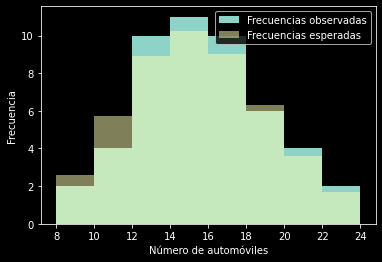

In [7]:
# Graficar el histograma y las frecuencias esperadas
fig, ax = plt.subplots()
ax.bar(intervalos[:-1], f_obs, width=np.diff(intervalos), align='edge', label='Frecuencias observadas')
ax.bar(intervalos[:-1], f_exp, width=np.diff(intervalos), align='edge', alpha=0.5, label='Frecuencias esperadas')
ax.set_xlabel('Número de automóviles')
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()